Loaded data. Intrinsic Dimension d = 10
Figure saved to: ../results/figures\fig4_saturation.pdf


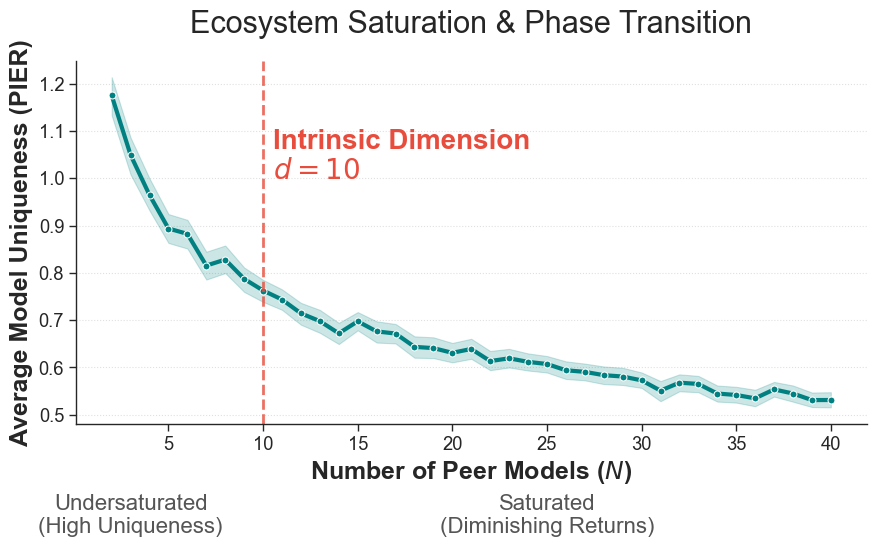

In [6]:
# %% [markdown]
# # Figure 4: Ecosystem Saturation & Phase Transition
# 
# This notebook visualizes the fundamental limit of an AI ecosystem's capacity.
# 
# **Theoretical Prediction:**
# As the number of peer models ($N$) increases, the available "uniqueness space" shrinks.
# When $N$ approaches the intrinsic task dimension ($d$), we expect a sharp **phase transition** where the average uniqueness (PIER) collapses toward zero.
# 
# **Key Insight for NMI:**
# This demonstrates that simply adding more models to an ecosystem yields diminishing returns. There is a finite "Capacity" for uniqueness.

# %%
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

# %% [markdown]
# ## 1. Load Experimental Data

# %%
DATA_PATH = "../results/tables/exp2_saturation.csv"
FIG_PATH = "../results/figures"

os.makedirs(FIG_PATH, exist_ok=True)

if not os.path.exists(DATA_PATH):
    raise FileNotFoundError(f"Data file not found at {DATA_PATH}. Please run 'experiments/exp2_saturation.py' first.")

df = pd.read_csv(DATA_PATH)

# Extract the dimension used in the experiment for plotting the vertical line
dimension = df['dimension'].iloc[0]
print(f"Loaded data. Intrinsic Dimension d = {dimension}")
df.head()

# %% [markdown]
# ## 2. Configure Nature-Style Aesthetics
# 
# We use a clean, scientific style.
# * **Color:** A gradient or distinct color (e.g., Purple or Teal) to distinguish from previous figures. Let's use **Teal** to represent "Capacity/Volume".

# %%
sns.set_context("paper", font_scale=1.5)
sns.set_style("ticks")

# Nature-style colors
COLOR_MAIN = "#008080" # Teal
COLOR_GUIDE = "#E74C3C" # Red for the limit line

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Helvetica', 'DejaVu Sans']

# %% [markdown]
# ## 3. Generate the Saturation Curve
# 
# We plot **Average PIER Score (Y-axis)** vs. **Number of Peers (X-axis)**.
# The shaded region is the 95% confidence interval.

# %%
plt.figure(figsize=(9, 6))

# Main Curve
ax = sns.lineplot(
    data=df,
    x="n_peers",
    y="pier_score",
    color=COLOR_MAIN,
    linewidth=3,
    marker="o",
    markersize=5,
    err_style="band", # Shaded confidence interval
    errorbar=('ci', 95) # 95% confidence interval
)

# --- Aesthetic Customization ---

# 1. Labels
ax.set_xlabel("Number of Peer Models ($N$)", fontsize=18, fontweight='bold')
ax.set_ylabel("Average Model Uniqueness (PIER)", fontsize=18, fontweight='bold')
ax.set_title("Ecosystem Saturation & Phase Transition", fontsize=22, pad=20)

# 2. Critical Theoretical Boundary (The "Capacity")
# Draw a vertical line at N = d (The theoretical saturation point)
plt.axvline(x=dimension, color=COLOR_GUIDE, linestyle='--', linewidth=2, alpha=0.8)

# 3. Annotations
# Phase 1: Undersaturated
ax.text(dimension * 0.3, ax.get_ylim()[1] * 0.2, 
        "Undersaturated\n(High Uniqueness)", 
        fontsize=16, color='#555555', ha='center')

# Phase 2: Saturated
ax.text(dimension * 2.5, ax.get_ylim()[1] * 0.2, 
        "Saturated\n(Diminishing Returns)", 
        fontsize=16, color='#555555', ha='center')

# Label the Limit Line
ax.text(dimension + 0.5, ax.get_ylim()[1] * 0.8, 
        f"Intrinsic Dimension\n$d = {dimension}$", 
        color=COLOR_GUIDE, fontsize=20, fontweight='bold')

# 4. Spines
sns.despine()

# 5. Grid (Optional, for readability)
ax.grid(True, which='major', axis='y', linestyle=':', alpha=0.6)

plt.tight_layout()

# %% [markdown]
# ## 4. Save Figure
# 
# This figure validates the **Ecosystem Saturation Theorem**.

# %%
save_path = os.path.join(FIG_PATH, "fig4_saturation.pdf")
plt.savefig(save_path, format="pdf", dpi=300, bbox_inches="tight")
print(f"Figure saved to: {save_path}")

# Show plot
plt.show()